<a href="https://colab.research.google.com/github/MustafaEmircan/Airline_Passenger_Forecasting_with_Time_Series_Models/blob/main/testugrasmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verinin İlk 5 Satırı:
                  date  pollution  dew  temp   press wnd_dir  wnd_spd  snow  \
0  2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0   
1  2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0   
2  2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0   
3  2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1   
4  2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2   

   rain  
0     0  
1     0  
2     0  
3     0  
4     0  

Veri Setinin Boyutu:
(43800, 9)

Sütun İsimleri:
Index(['date', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd',
       'snow', 'rain'],
      dtype='object')

Sütunların Veri Türleri:
date          object
pollution    float64
dew            int64
temp         float64
press        float64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
dtype: object

Eksik Değerlerin Sayısı:
date         0
pol

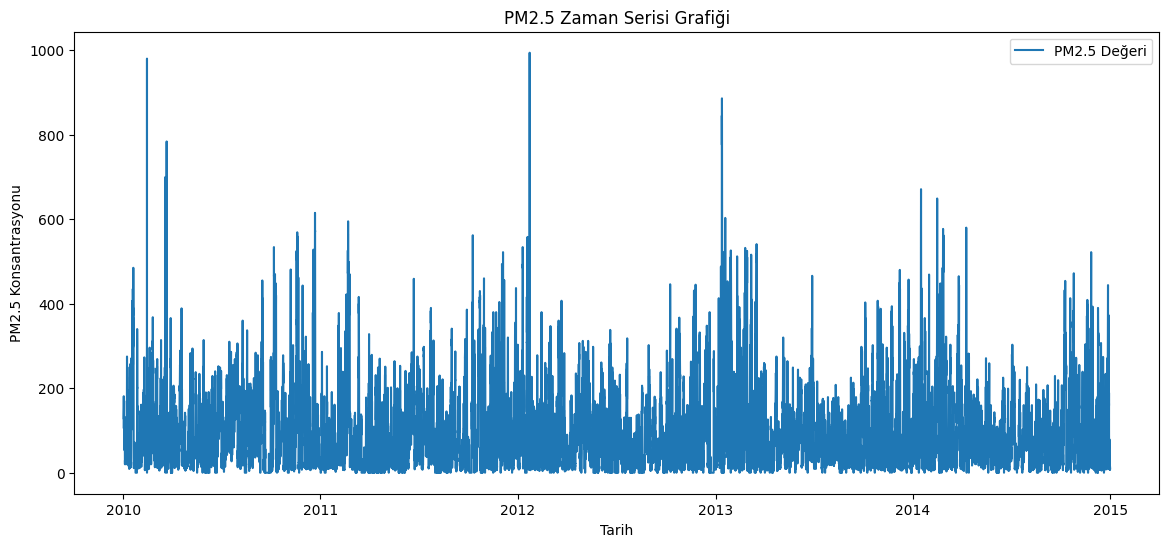

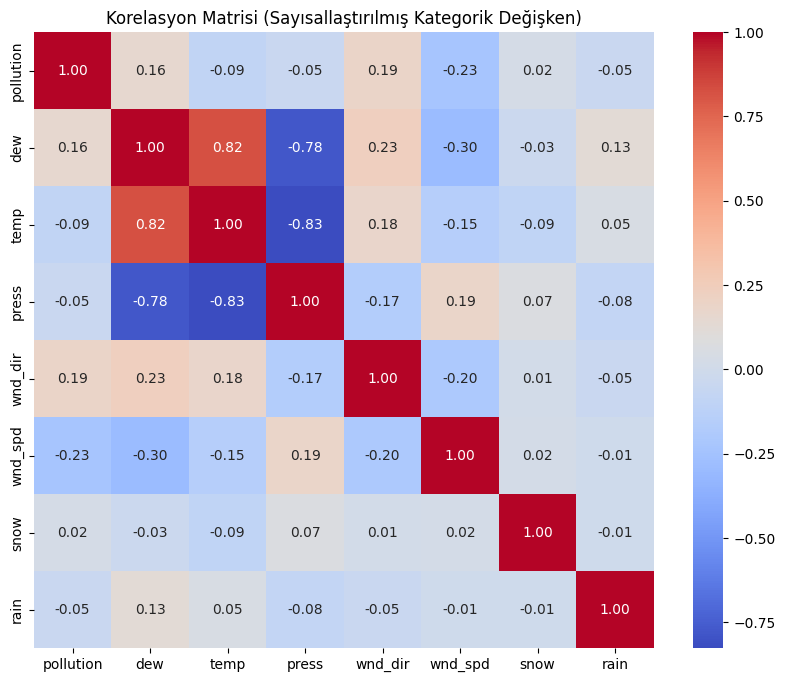

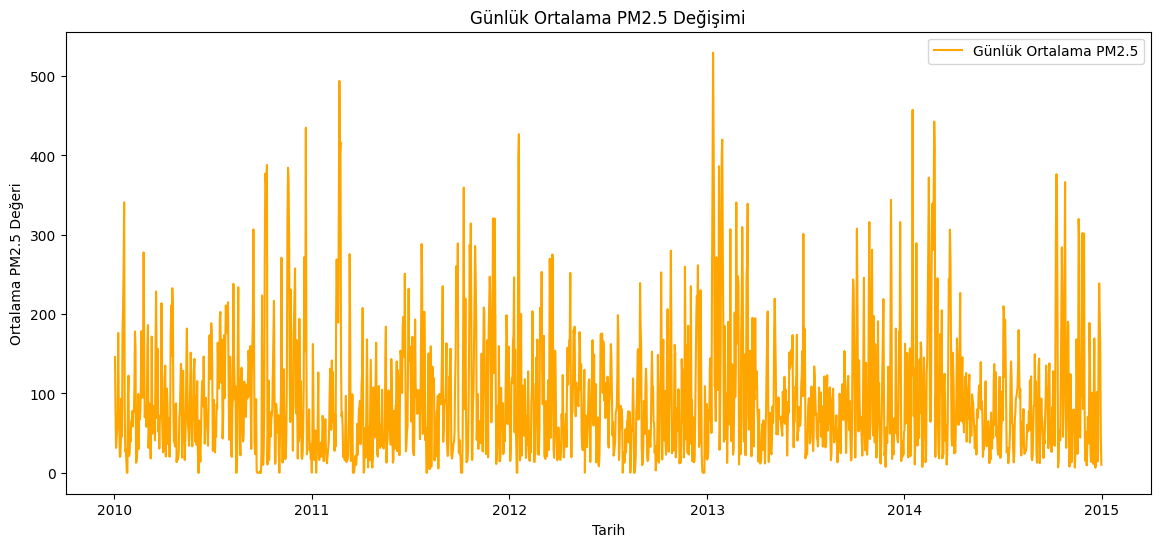

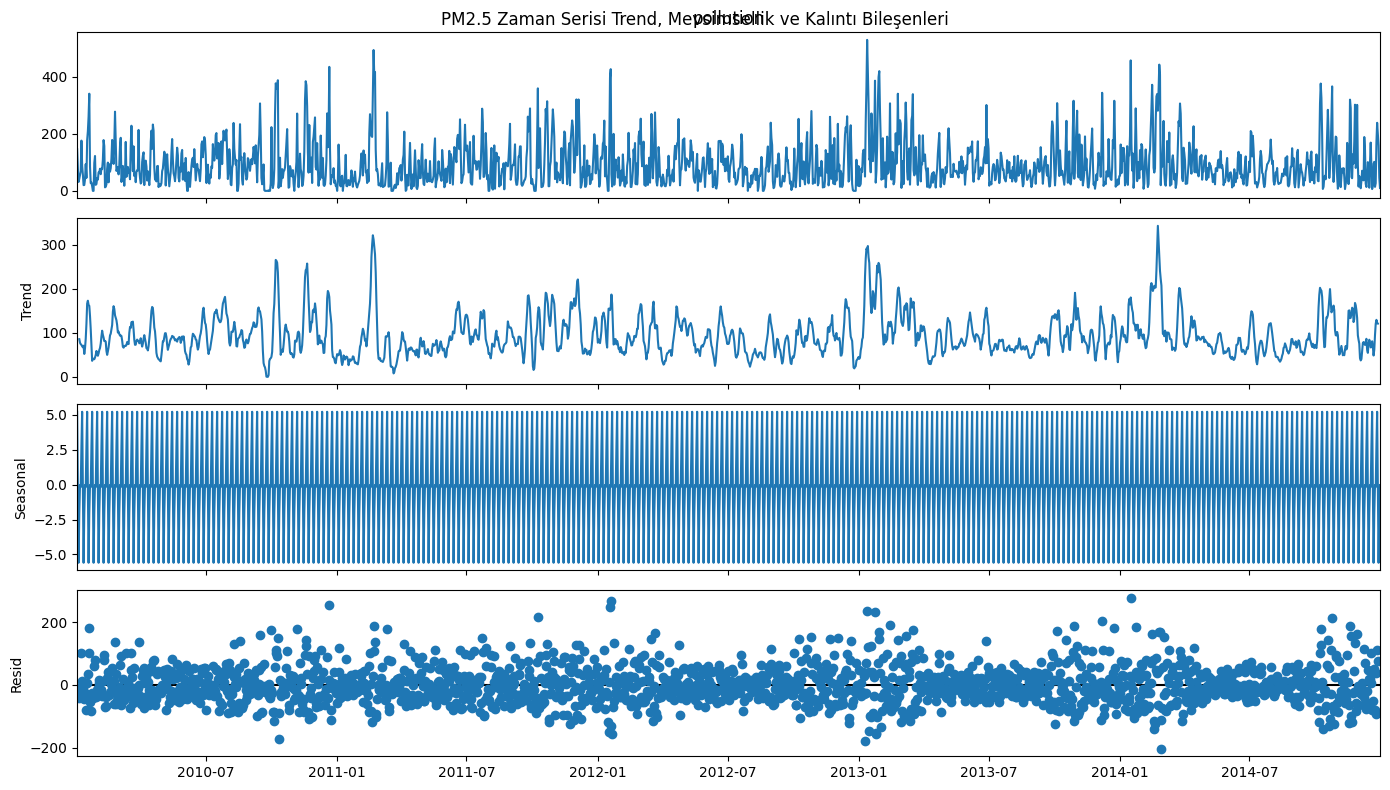

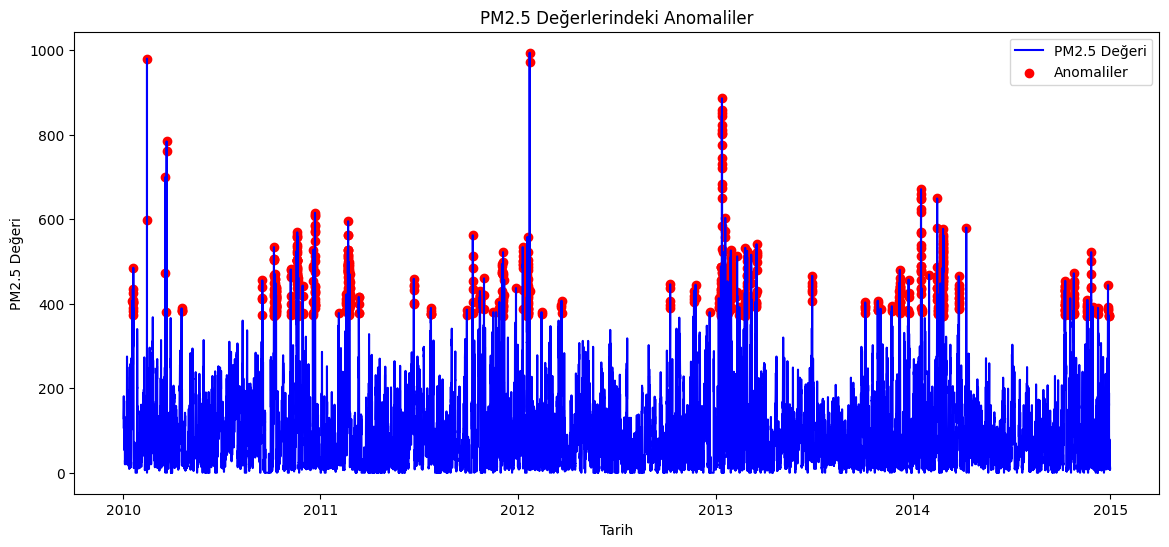

<ipython-input-1-7cc291947e7a>:140: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_pm25 = df['pollution'].resample('M').mean()


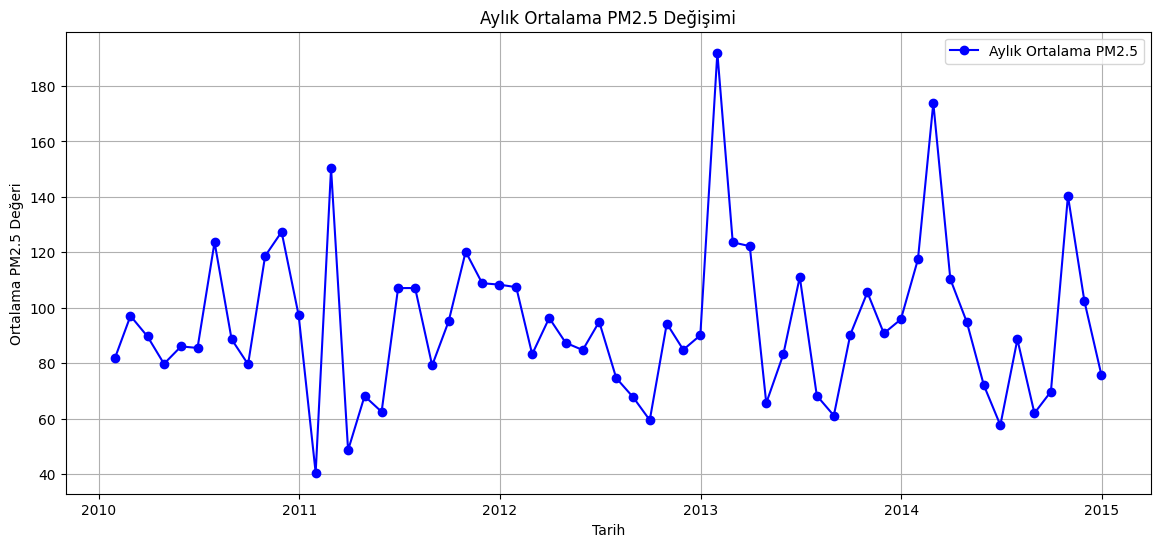

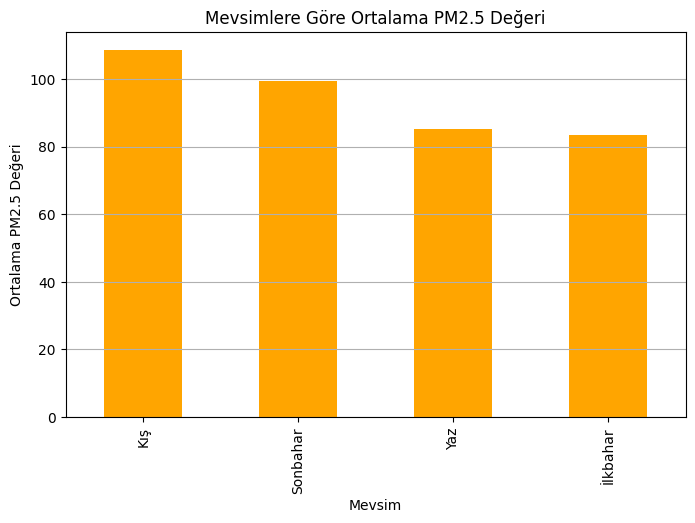

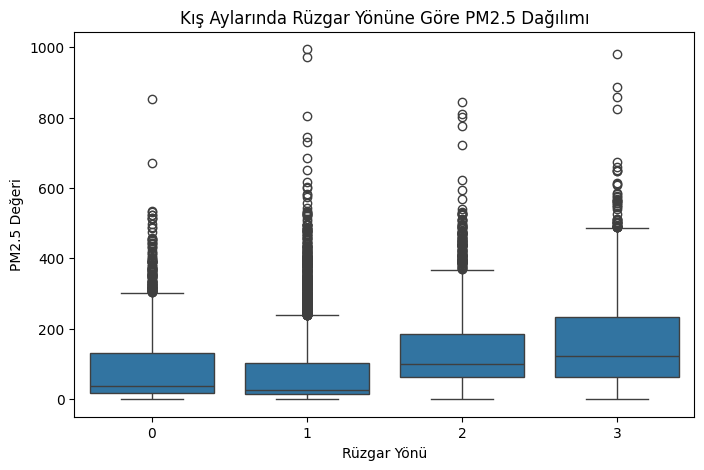

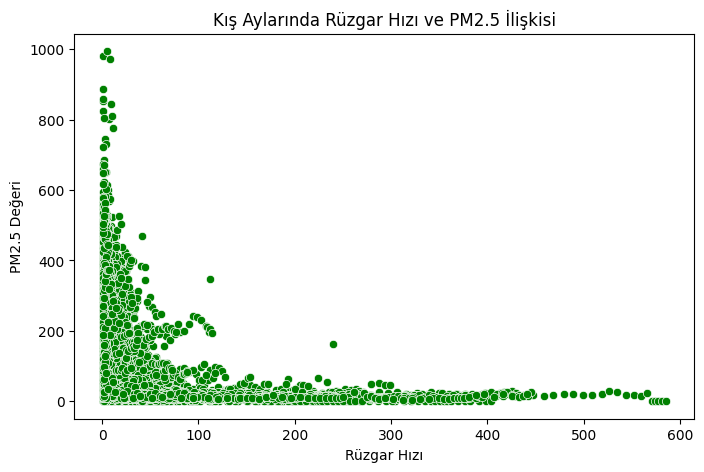

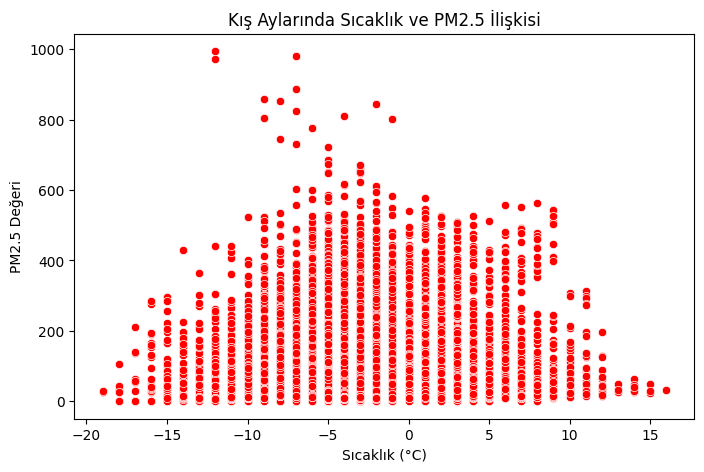

'### **Kış Aylarında PM2.5 Seviyeleri Üzerine Bulgular ve Yorum**\n\n1. **Aylık Ortalama PM2.5 Değişimi**:  \n   Yapılan analiz sonucunda, PM2.5 seviyelerinin **kış aylarında (Aralık, Ocak, Şubat)** belirgin bir şekilde yükseldiği gözlemlenmiştir. Bu artış, özellikle kış aylarında yaşanan **ısıtma sistemlerinin kullanımı**, **düşük hava akımı** ve hava durumu etkileriyle açıklanabilir.\n\n2. **Mevsimsel Değişimler**:  \n   Mevsimlere göre PM2.5 seviyelerinin ortalamaları karşılaştırıldığında, kış aylarında PM2.5 değerlerinin diğer mevsimlere göre **daha yüksek** olduğu tespit edilmiştir.  \n   Bu durum, soğuk hava koşulları ve yüksek enerji ihtiyacı nedeniyle **katı yakıt kullanımının artması** ile ilişkilendirilebilir.\n\n3. **Rüzgar Yönü ve PM2.5 Seviyeleri**:  \n   Kış aylarında **belirli rüzgar yönlerinin** (örneğin, SE - Güneydoğu) PM2.5 seviyelerini etkilediği görülmüştür. Bu durum, rüzgarın taşıdığı hava kirliliğinin belirli bölgelere yoğunlaşmasıyla açıklanabilir.\n\n4. **Rüzga

In [ ]:
# -*- coding: utf-8 -*-
"""YapayZekaProje.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1FVKjUzcrBD9mKtp2KanGo3aKZ-r9OaCb
"""

# Gerekli kütüphaneleri yükleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# CSV dosyasını okuma
file_path = '/content/LSTM-Multivariate_pollution.csv'
df = pd.read_csv(file_path)

# İlk 5 satırı görüntüleme
print("Verinin İlk 5 Satırı:")
print(df.head())

# Veri boyutunu kontrol etme
print("\nVeri Setinin Boyutu:")
print(df.shape)

# Sütun isimlerini listeleme
print("\nSütun İsimleri:")
print(df.columns)

# Veri türlerini kontrol etme
print("\nSütunların Veri Türleri:")
print(df.dtypes)

# Eksik değerleri kontrol etme
print("\nEksik Değerlerin Sayısı:")
print(df.isnull().sum())

# Eksik değerlerin yüzdesini hesaplama
print("\nEksik Değerlerin Yüzdesi:")
print((df.isnull().sum() / len(df)) * 100)

"""- Date: Zaman bilgisi (saatlik).
- Pollution: PM2.5 hava kirliliği ölçümü (hedef değişken).
- Dew: Çiy noktası.
- Temp: Sıcaklık.
- Press: Basınç.
- Wnd_dir: Rüzgar yönü (kategorik).
- Wnd_spd: Rüzgar hızı.
- Snow: Kar yağış süresi (saat).
- Rain: Yağmur yağış süresi (saat).
"""

df.head()

# Numerik sütunların istatistiksel özeti
print("\nTemel İstatistiksel Özet:")
print(df.describe())

# 'date' sütununu datetime formatına dönüştürme
df['date'] = pd.to_datetime(df['date'])

# 'date' sütununu indeks olarak ayarlama
df.set_index('date', inplace=True)

# Veri setinin başını kontrol etme
print("\nİndeks Olarak Ayarlanmış Veri Seti:")
print(df.head())

# PM2.5 değerinin zaman içindeki değişimi
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['pollution'], label='PM2.5 Değeri')
plt.xlabel('Tarih')
plt.ylabel('PM2.5 Konsantrasyonu')
plt.title('PM2.5 Zaman Serisi Grafiği')
plt.legend()
plt.show()

df["wnd_dir"].value_counts()

# Kategorik değişkeni sayısallaştırma
label_encoder = LabelEncoder()
df['wnd_dir'] = label_encoder.fit_transform(df['wnd_dir'])

# Korelasyon matrisi hesaplama
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi (Sayısallaştırılmış Kategorik Değişken)")
plt.show()

df["wnd_dir"].value_counts()

# Günlük ortalama PM2.5 hesaplama
daily_avg = df['pollution'].resample('D').mean()

# Günlük ortalama PM2.5 grafiği
plt.figure(figsize=(14, 6))
plt.plot(daily_avg.index, daily_avg, color='orange', label='Günlük Ortalama PM2.5')
plt.xlabel('Tarih')
plt.ylabel('Ortalama PM2.5 Değeri')
plt.title('Günlük Ortalama PM2.5 Değişimi')
plt.legend()
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

# Zaman serisi dekompozisyonu (aylık)
decomposition = seasonal_decompose(df['pollution'].resample('D').mean(), model='additive')

# Bileşenlerin görselleştirilmesi
plt.rcParams.update({'figure.figsize': (14, 8)})
decomposition.plot()
plt.suptitle("PM2.5 Zaman Serisi Trend, Mevsimsellik ve Kalıntı Bileşenleri")
plt.show()

# Z-skoru kullanarak anomali tespiti
df['z_score'] = (df['pollution'] - df['pollution'].mean()) / df['pollution'].std()
anomalies = df[np.abs(df['z_score']) > 3]  # Z-skoru 3'ten büyük olanlar anomalidir

# Anomalileri görselleştirme
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['pollution'], label='PM2.5 Değeri', color='blue')
plt.scatter(anomalies.index, anomalies['pollution'], color='red', label='Anomaliler')
plt.xlabel('Tarih')
plt.ylabel('PM2.5 Değeri')
plt.title('PM2.5 Değerlerindeki Anomaliler')
plt.legend()
plt.show()

"""- Özellikle 2010, 2012 ve 2013 yıllarında çok yüksek PM2.5 değerleri dikkat çekiyor.
- 1000 değerine yakın seviyelerde büyük sıçramalar mevcut. Bu anormallikler, hava kirliliğini etkileyen ani olaylara (örneğin, endüstriyel emisyonlar, mevsimsel hava koşulları veya yangınlar) işaret edebilir.
"""

# Aylık ortalama PM2.5 değerleri
monthly_avg_pm25 = df['pollution'].resample('M').mean()

# Aylık ortalama PM2.5 grafiği
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25, color='blue', marker='o', label='Aylık Ortalama PM2.5')
plt.xlabel('Tarih')
plt.ylabel('Ortalama PM2.5 Değeri')
plt.title('Aylık Ortalama PM2.5 Değişimi')
plt.legend()
plt.grid()
plt.show()

# Mevsimsel gruplama için ay bilgilerini ekleme
df['month'] = df.index.month
df['season'] = df['month'].map({
    12: 'Kış', 1: 'Kış', 2: 'Kış',
    3: 'İlkbahar', 4: 'İlkbahar', 5: 'İlkbahar',
    6: 'Yaz', 7: 'Yaz', 8: 'Yaz',
    9: 'Sonbahar', 10: 'Sonbahar', 11: 'Sonbahar'
})

# Mevsimlere göre ortalama PM2.5 değerleri
seasonal_avg_pm25 = df.groupby('season')['pollution'].mean()

# Mevsimsel ortalama PM2.5 grafiği
plt.figure(figsize=(8, 5))
seasonal_avg_pm25.plot(kind='bar', color='orange')
plt.title('Mevsimlere Göre Ortalama PM2.5 Değeri')
plt.ylabel('Ortalama PM2.5 Değeri')
plt.xlabel('Mevsim')
plt.grid(axis='y')
plt.show()

# Kış aylarını seçme
winter_data = df[df['season'] == 'Kış']

# Rüzgar yönü ve PM2.5 arasındaki ilişkiyi inceleme
plt.figure(figsize=(8, 5))
sns.boxplot(x='wnd_dir', y='pollution', data=winter_data)
plt.title('Kış Aylarında Rüzgar Yönüne Göre PM2.5 Dağılımı')
plt.ylabel('PM2.5 Değeri')
plt.xlabel('Rüzgar Yönü')
plt.show()

# Rüzgar hızı ve PM2.5 ilişkisi
plt.figure(figsize=(8, 5))
sns.scatterplot(x='wnd_spd', y='pollution', data=winter_data, color='green')
plt.title('Kış Aylarında Rüzgar Hızı ve PM2.5 İlişkisi')
plt.xlabel('Rüzgar Hızı')
plt.ylabel('PM2.5 Değeri')
plt.show()

# Kış aylarında sıcaklık ve PM2.5 ilişkisi
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='pollution', data=winter_data, color='red')
plt.title('Kış Aylarında Sıcaklık ve PM2.5 İlişkisi')
plt.xlabel('Sıcaklık (°C)')
plt.ylabel('PM2.5 Değeri')
plt.show()

"""### **Kış Aylarında PM2.5 Seviyeleri Üzerine Bulgular ve Yorum**

1. **Aylık Ortalama PM2.5 Değişimi**:
   Yapılan analiz sonucunda, PM2.5 seviyelerinin **kış aylarında (Aralık, Ocak, Şubat)** belirgin bir şekilde yükseldiği gözlemlenmiştir. Bu artış, özellikle kış aylarında yaşanan **ısıtma sistemlerinin kullanımı**, **düşük hava akımı** ve hava durumu etkileriyle açıklanabilir.

2. **Mevsimsel Değişimler**:
   Mevsimlere göre PM2.5 seviyelerinin ortalamaları karşılaştırıldığında, kış aylarında PM2.5 değerlerinin diğer mevsimlere göre **daha yüksek** olduğu tespit edilmiştir.
   Bu durum, soğuk hava koşulları ve yüksek enerji ihtiyacı nedeniyle **katı yakıt kullanımının artması** ile ilişkilendirilebilir.

3. **Rüzgar Yönü ve PM2.5 Seviyeleri**:
   Kış aylarında **belirli rüzgar yönlerinin** (örneğin, SE - Güneydoğu) PM2.5 seviyelerini etkilediği görülmüştür. Bu durum, rüzgarın taşıdığı hava kirliliğinin belirli bölgelere yoğunlaşmasıyla açıklanabilir.

4. **Rüzgar Hızı ve PM2.5 İlişkisi**:
   Rüzgar hızı ve PM2.5 arasındaki ilişki incelendiğinde, **düşük rüzgar hızlarında** PM2.5 seviyelerinin yükseldiği gözlemlenmiştir. Düşük hava akımı, hava kirliliğinin atmosferde birikmesine ve yayılmamasına neden olmaktadır.

5. **Sıcaklık ve PM2.5 İlişkisi**:
   Sıcaklık verilerinin analizi sonucunda, **düşük sıcaklıklarda** PM2.5 seviyelerinde artış gözlenmiştir. Bu durum, ısınma amaçlı fosil yakıt kullanımının kış aylarında artmasıyla doğrudan ilişkilidir.

---

### **Sonuç**:
Bu bulgular, PM2.5 seviyelerindeki artışın **kış aylarında** daha yoğun görüldüğünü ve bu durumun **ısıtma faaliyetleri, düşük rüzgar hızı ve belirli rüzgar yönlerinin etkisi** ile açıklanabileceğini göstermektedir. Modelleme aşamasında bu faktörlerin dikkate alınması, PM2.5 seviyelerinin tahmin doğruluğunu artıracaktır. Özellikle **rüzgar yönü**, **rüzgar hızı** ve **sıcaklık** değişkenleri, PM2.5 seviyelerini anlamada önemli rol oynamaktadır.

Bu analizler, hava kirliliği tahmin modellerinin geliştirilmesinde ve kış aylarındaki hava kalitesinin iyileştirilmesi için stratejik önlemler alınmasında faydalı olacaktır.

## Data Preprocessing

- Gecikmeli (Lagged) Özellikler Oluşturma
"""




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# Veri setlerini yükleme
train_data = pd.read_csv("/content/LSTM-Multivariate_pollution.csv")
test_data = pd.read_csv("/content/pollution_test_data1.csv")

In [ ]:
# Train verisinin ilk 5 satırını görüntüleme
print("Train Verisi:\n", train_data.head())

Train Verisi:
                   date  pollution  dew  temp   press wnd_dir  wnd_spd  snow  \
0  2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0   
1  2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0   
2  2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0   
3  2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1   
4  2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2   

   rain  
0     0  
1     0  
2     0  
3     0  
4     0  


In [ ]:
# Test verisinin ilk 5 satırını görüntüleme
print("Test Verisi:\n", test_data.head())

Test Verisi:
    dew  temp  press wnd_dir  wnd_spd  snow  rain  pollution
0  -16     4   1027      SE     3.58     0     0        128
1  -17     5   1027      SE     7.60     0     0         77
2  -16     4   1027      SE     9.39     0     0         65
3  -16     1   1028      cv     0.89     0     0         79
4  -14     0   1028      NE     1.79     0     0         93


In [ ]:
# Eksik değerleri kontrol etme
print("\nTrain verisindeki eksik değerler:\n", train_data.isnull().sum())
print("\nTest verisindeki eksik değerler:\n", test_data.isnull().sum())


Train verisindeki eksik değerler:
 date         0
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

Test verisindeki eksik değerler:
 dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
pollution    0
dtype: int64


In [ ]:
# Tarih sütununu datetime formatına dönüştürme
if {'year', 'month', 'day', 'hour'}.issubset(train_data.columns):
    train_data['date'] = pd.to_datetime(train_data[['year', 'month', 'day', 'hour']])
if {'year', 'month', 'day', 'hour'}.issubset(test_data.columns):
    test_data['date'] = pd.to_datetime(test_data[['year', 'month', 'day', 'hour']])

In [ ]:
# Kullanılacak sütunları belirleme (güncellenmiş isimlerle)
all_possible_features = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
features = [col for col in all_possible_features if col in train_data.columns and col in test_data.columns]
print("Kullanılacak Özellikler:", features)

Kullanılacak Özellikler: ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']


In [ ]:
# Kategorik değişkenleri encoding işlemi (wnd_dir)
if 'wnd_dir' in features:
    label_encoder = LabelEncoder()
    train_data['wnd_dir'] = label_encoder.fit_transform(train_data['wnd_dir'])
    test_data['wnd_dir'] = label_encoder.transform(test_data['wnd_dir'])

In [ ]:
# Eksik değerleri kontrol etme ve doldurma
for feature in features:
    train_data[feature] = train_data[feature].interpolate(method='linear')
    test_data[feature] = test_data[feature].interpolate(method='linear')

In [ ]:
train_data.columns

Index(['date', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd',
       'snow', 'rain'],
      dtype='object')

In [ ]:
# Ölçeklendirme işlemi (MinMaxScaler)
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[features])
scaled_test = scaler.transform(test_data[features])

In [ ]:
# Lagged değerler ekleme
sequence_length = 24  # Önceki 24 saate bakarak tahmin yapacağız
X_train, y_train = [], []
for i in range(sequence_length, len(scaled_train)):
    X_train.append(scaled_train[i-sequence_length:i])
    y_train.append(scaled_train[i, 0])  # pollution hedef değişkeni
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_test = []
for i in range(sequence_length, len(scaled_test)):
    X_test.append(scaled_test[i-sequence_length:i])
X_test = np.array(X_test)

In [ ]:
# Zaman tabanlı train-validation ayrımı: Son %20 veriyi validation seti olarak kullanma
train_size = int(len(X_train) * 0.8)
X_val, y_val = X_train[train_size:], y_train[train_size:]
X_train, y_train = X_train[:train_size], y_train[:train_size]

In [ ]:
# Train-validation ayırımını açıkça belirtme
print("\nTrain verisi boyutu:", X_train.shape, "Validation verisi boyutu:", X_val.shape)


Train verisi boyutu: (35020, 24, 8) Validation verisi boyutu: (8756, 24, 8)


In [ ]:
# LSTM modelinin oluşturulması
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early stopping callback eklenmesi
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Modeli eğitme
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=2, callbacks=[early_stopping])

Epoch 1/50
548/548 - 23s - 42ms/step - loss: 0.0027 - mae: 0.0342 - val_loss: 0.0023 - val_mae: 0.0358
Epoch 2/50
548/548 - 17s - 31ms/step - loss: 0.0011 - mae: 0.0211 - val_loss: 7.6233e-04 - val_mae: 0.0169
Epoch 3/50
548/548 - 16s - 30ms/step - loss: 9.3911e-04 - mae: 0.0183 - val_loss: 6.5717e-04 - val_mae: 0.0153
Epoch 4/50
548/548 - 18s - 33ms/step - loss: 8.6332e-04 - mae: 0.0169 - val_loss: 5.9934e-04 - val_mae: 0.0139
Epoch 5/50
548/548 - 20s - 36ms/step - loss: 8.3687e-04 - mae: 0.0165 - val_loss: 6.6573e-04 - val_mae: 0.0167
Epoch 6/50
548/548 - 20s - 36ms/step - loss: 8.1943e-04 - mae: 0.0159 - val_loss: 5.7211e-04 - val_mae: 0.0133
Epoch 7/50
548/548 - 22s - 40ms/step - loss: 7.9387e-04 - mae: 0.0154 - val_loss: 5.4854e-04 - val_mae: 0.0126
Epoch 8/50
548/548 - 17s - 30ms/step - loss: 7.7665e-04 - mae: 0.0152 - val_loss: 5.7230e-04 - val_mae: 0.0132
Epoch 9/50
548/548 - 22s - 40ms/step - loss: 7.7479e-04 - mae: 0.0151 - val_loss: 5.5722e-04 - val_mae: 0.0129
Epoch 10/50
5

In [ ]:
# Test verisi üzerinde tahmin
predictions = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [ ]:
# Test verisindeki gerçek pollution değerlerini al
actual_test = scaled_test[sequence_length:, 0]  # Test setindeki gerçek pollution değerleri

In [ ]:
# Sonuçları geri ölçeklendirme
predictions_rescaled = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], len(features)-1))), axis=1))[:, 0]
actual_rescaled = scaler.inverse_transform(np.concatenate((actual_test.reshape(-1, 1), np.zeros((len(actual_test), len(features)-1))), axis=1))[:, 0]

In [ ]:
# Hata metriklerinin hesaplanması
rmse = np.sqrt(mean_squared_error(actual_rescaled, predictions_rescaled))
mae = mean_absolute_error(actual_rescaled, predictions_rescaled)
r2 = r2_score(actual_rescaled, predictions_rescaled)

print("\nModel Performansı:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2 Skoru:", r2)


Model Performansı:
RMSE: 25.224196446946323
MAE: 13.766436454147296
R^2 Skoru: 0.9367168187361246


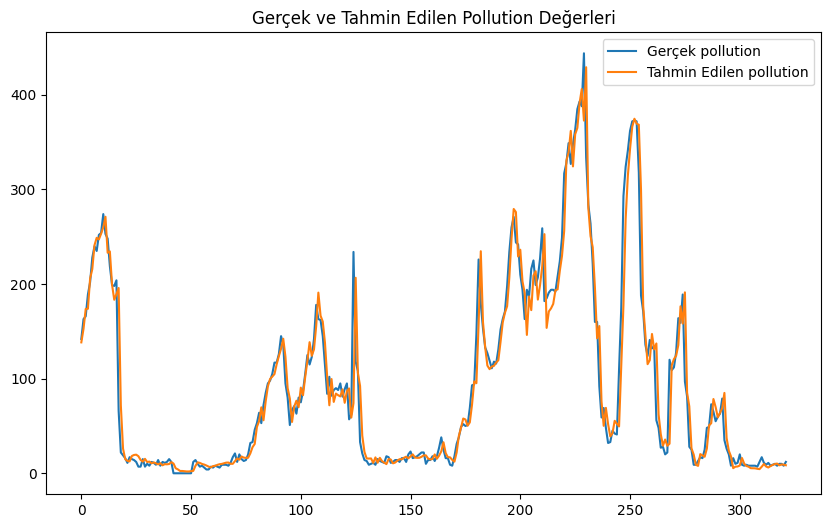

In [ ]:
# Tahminlerin görüntülenmesi
plt.figure(figsize=(10, 6))
plt.plot(actual_rescaled, label='Gerçek pollution')
plt.plot(predictions_rescaled, label='Tahmin Edilen pollution')
plt.title("Gerçek ve Tahmin Edilen Pollution Değerleri")
plt.legend()
plt.show()

In [ ]:
test_data["pollution"].mean()

96.39884393063583

In [ ]:
test_data["pollution"].std()

98.29852431607304

In [ ]:
test_data["pollution"].max()

444

In [ ]:
test_data["pollution"].min()

0

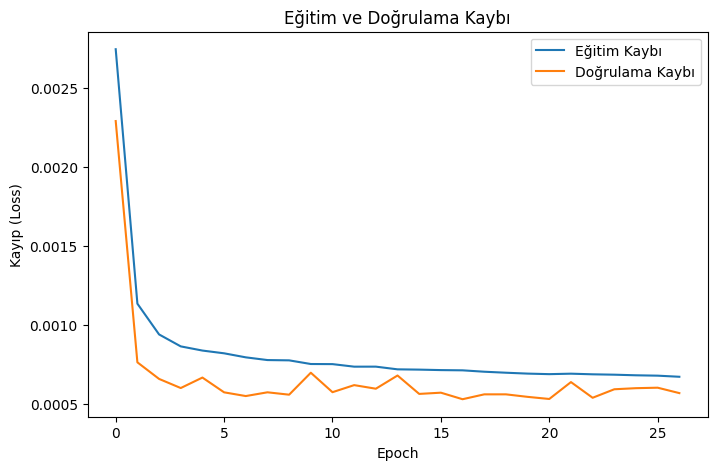

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()
plt.show()

#########################################################################################################################################################

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# Veri setlerini yükleme
train_data = pd.read_csv("/content/LSTM-Multivariate_pollution.csv")
test_data = pd.read_csv("/content/pollution_test_data1.csv")

In [ ]:
train_data.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
# Kullanılacak sütunları belirleme (güncellenmiş isimlerle)
all_possible_features = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
features = [col for col in all_possible_features if col in train_data.columns and col in test_data.columns]
print("Kullanılacak Özellikler:", features)

Kullanılacak Özellikler: ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']


In [ ]:
# Kategorik değişkenleri One-Hot Encoding ile dönüştürme (wnd_dir)
if 'wnd_dir' in features:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    wind_train = encoder.fit_transform(train_data[['wnd_dir']])
    wind_test = encoder.transform(test_data[['wnd_dir']])
    wind_columns = [f"wnd_dir_{i}" for i in range(wind_train.shape[1])]
    wind_train_df = pd.DataFrame(wind_train, columns=wind_columns)
    wind_test_df = pd.DataFrame(wind_test, columns=wind_columns)
    train_data = pd.concat([train_data.reset_index(drop=True), wind_train_df], axis=1)
    test_data = pd.concat([test_data.reset_index(drop=True), wind_test_df], axis=1)
    features.remove('wnd_dir')
    features += wind_columns

<Figure size 1000x600 with 0 Axes>

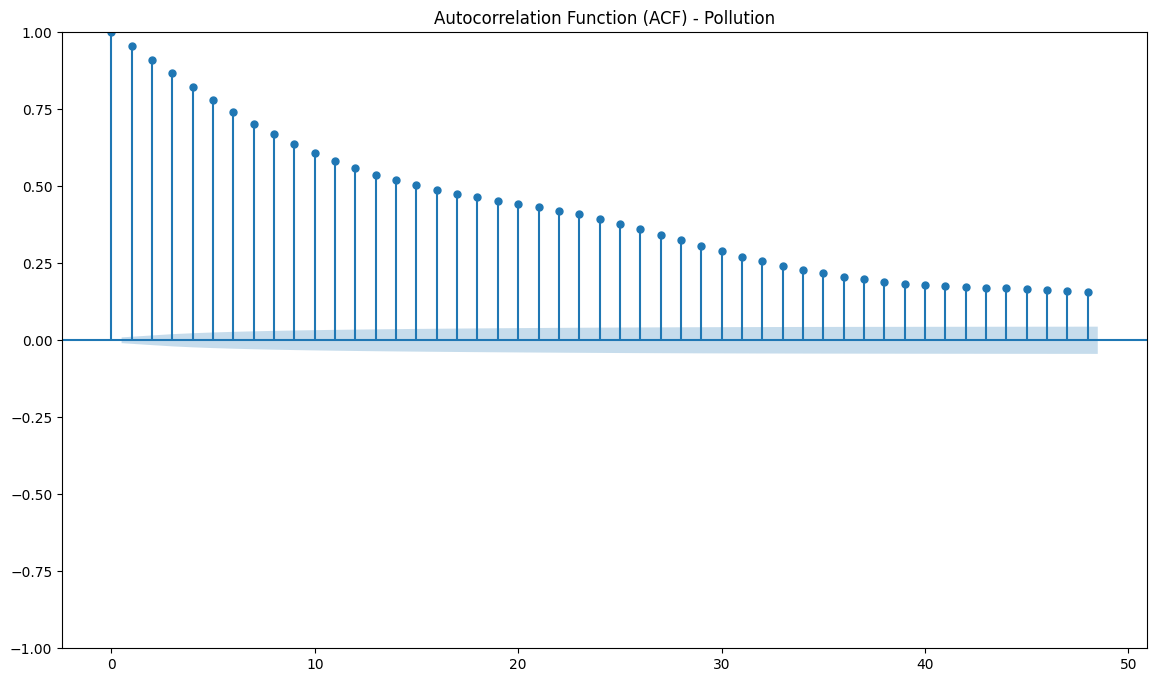

In [ ]:
# Autocorrelation Function (ACF) ile gecikme analizi
plt.figure(figsize=(10, 6))
plot_acf(train_data['pollution'].dropna(), lags=48)
plt.title("Autocorrelation Function (ACF) - Pollution")
plt.show()

In [ ]:
# Ölçeklendirme işlemi (MinMaxScaler)
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[features])
scaled_test = scaler.transform(test_data[features])

In [ ]:
# Lagged değerler ekleme
sequence_length = 12  # Önceki 12 saate bakarak tahmin yapacağız
X_train, y_train = [], []
for i in range(sequence_length, len(scaled_train)):
    X_train.append(scaled_train[i-sequence_length:i])
    y_train.append(scaled_train[i, 0])  # pollution hedef değişkeni
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_test = []
for i in range(sequence_length, len(scaled_test)):
    X_test.append(scaled_test[i-sequence_length:i])
X_test = np.array(X_test)

In [ ]:
# Zaman tabanlı train-validation ayrımı: Son %20 veriyi validation seti olarak kullanma
train_size = int(len(X_train) * 0.8)
X_val, y_val = X_train[train_size:], y_train[train_size:]
X_train, y_train = X_train[:train_size], y_train[:train_size]

In [ ]:
# Train-validation ayırımını açıkça belirtme
print("\nTrain verisi boyutu:", X_train.shape, "Validation verisi boyutu:", X_val.shape)


Train verisi boyutu: (35030, 12, 10) Validation verisi boyutu: (8758, 12, 10)


In [ ]:
# LSTM modelinin oluşturulması
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early stopping callback eklenmesi
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Modeli eğitme
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/100
1095/1095 - 36s - 33ms/step - loss: 0.0019 - val_loss: 8.4417e-04
Epoch 2/100
1095/1095 - 40s - 36ms/step - loss: 9.5921e-04 - val_loss: 6.1173e-04
Epoch 3/100
1095/1095 - 42s - 38ms/step - loss: 8.4907e-04 - val_loss: 5.8456e-04
Epoch 4/100
1095/1095 - 43s - 39ms/step - loss: 8.0564e-04 - val_loss: 5.8584e-04
Epoch 5/100
1095/1095 - 31s - 28ms/step - loss: 7.8937e-04 - val_loss: 5.8060e-04
Epoch 6/100
1095/1095 - 41s - 38ms/step - loss: 7.7039e-04 - val_loss: 5.8527e-04
Epoch 7/100
1095/1095 - 41s - 37ms/step - loss: 7.6555e-04 - val_loss: 5.7731e-04
Epoch 8/100
1095/1095 - 41s - 37ms/step - loss: 7.5118e-04 - val_loss: 5.5272e-04
Epoch 9/100
1095/1095 - 41s - 38ms/step - loss: 7.4956e-04 - val_loss: 5.3467e-04
Epoch 10/100
1095/1095 - 41s - 37ms/step - loss: 7.4077e-04 - val_loss: 6.0573e-04
Epoch 11/100
1095/1095 - 41s - 38ms/step - loss: 7.2852e-04 - val_loss: 5.6764e-04
Epoch 12/100
1095/1095 - 41s - 38ms/step - loss: 7.3047e-04 - val_loss: 5.5268e-04
Epoch 13/100
1095

In [ ]:
# Test verisi üzerinde tahmin
predictions = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [ ]:
# Test verisindeki gerçek pollution değerlerini al
actual_test = scaled_test[sequence_length:, 0]  # Test setindeki gerçek pollution değerleri

In [ ]:
# Sonuçları geri ölçeklendirme
predictions_rescaled = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], scaled_test.shape[1]-1)))))[:, 0]
actual_rescaled = scaler.inverse_transform(np.hstack((actual_test.reshape(-1, 1), np.zeros((len(actual_test), scaled_test.shape[1]-1)))))[:, 0]

In [ ]:
# Hata metriklerinin hesaplanması
rmse = np.sqrt(mean_squared_error(actual_rescaled, predictions_rescaled))
mae = mean_absolute_error(actual_rescaled, predictions_rescaled)
r2 = r2_score(actual_rescaled, predictions_rescaled)

print("\nModel Performansı:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2 Skoru:", r2)


Model Performansı:
RMSE: 25.72682953582929
MAE: 14.285466269734957
R^2 Skoru: 0.9322023211334055


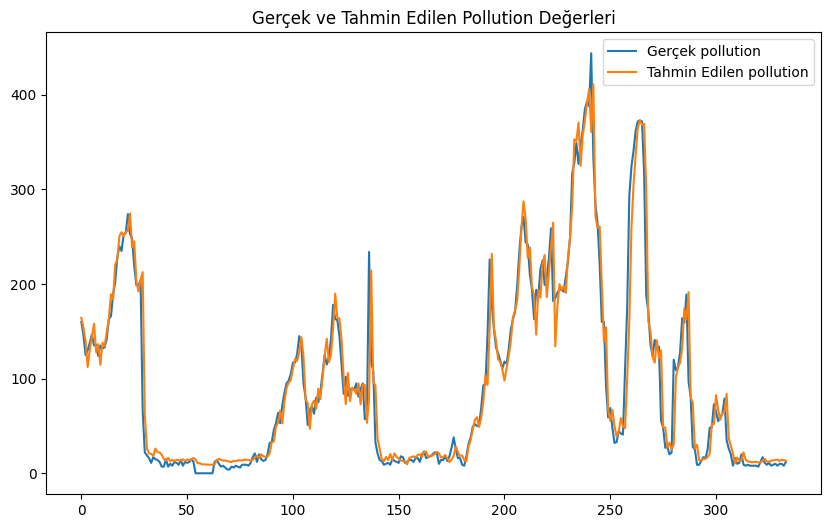

In [ ]:
# Tahminlerin görüntülenmesi
plt.figure(figsize=(10, 6))
plt.plot(actual_rescaled, label='Gerçek pollution')
plt.plot(predictions_rescaled, label='Tahmin Edilen pollution')
plt.title("Gerçek ve Tahmin Edilen Pollution Değerleri")
plt.legend()
plt.show()

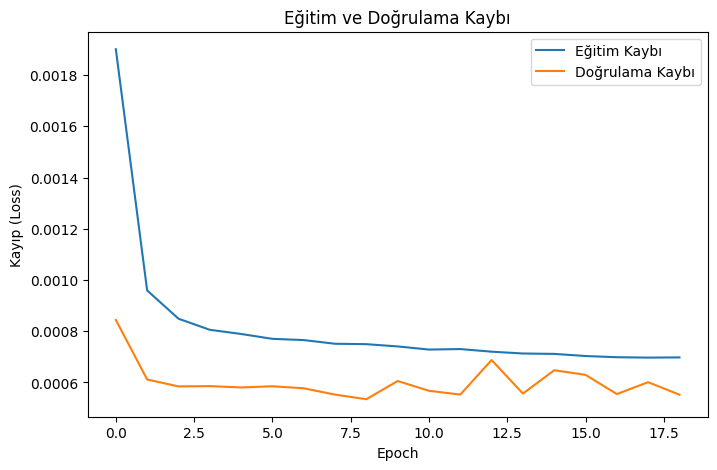

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()
plt.show()

########################################################################################################################################################################################################################